In [1]:
!pip install ninja -q

In [2]:
import torch
import dnnlib
import numpy as np
import matplotlib.pyplot as plt
import legacy
import ninja

device = torch.device('cuda')
pkl_path = '/notebooks/training-runs/network-conditional.pkl'

In [3]:
with dnnlib.util.open_url(pkl_path) as f:
    G = legacy.load_network_pkl(f)['G'].to(device)# torch.nn.Module

In [ ]:
# Class Codes

# 0 - INDIAN FEMALE
# 1 - BLACK FEMALE
# 2 - ASIAN FEMALE
# 3 - ASIAN MALE
# 4 - WHITE MALE
# 5 - INDIAN MALE
# 6 - BLACK MALE
# 7 - WHITE FEMALE

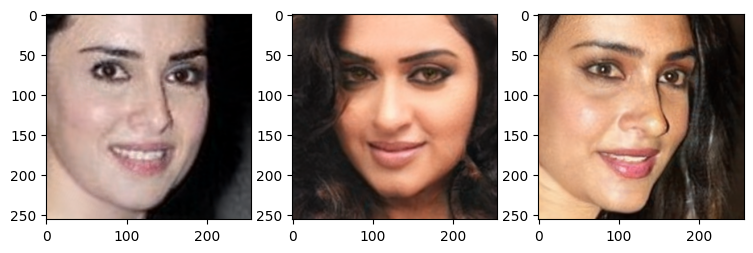

In [7]:
class_code = 0

plt.figure(figsize=(9,3)) # specifying the overall grid size

c = torch.zeros([1, G.c_dim], device = device)
c[:, class_code] = 1

for i in range(3):
    z = torch.randn([1, G.z_dim], device = device) 
    img = G(z, c)
    img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
    plt.subplot(1,3,i+1) 
    plt.imshow(img[0].cpu().numpy())

plt.show()